<a href="https://colab.research.google.com/github/apriandito/dl-python/blob/main/CNN_Object_Detection_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning for the CIFAR-10 Dataset**

Neural networks are versatile models that can learn just about any complex pattern. These powerful models are the core of deep learning consisting of multi-layer perceptrons, convolutional networks, sequence models and many more. In this brief project, we will explore the CIFAR-10 dataset.

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.

The CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. Since we are working with coloured images, our data will consist of numeric values that will be split based on the RGB scale.

The class labels and their standard associated integer values are listed below.


*   0: airplane
*   1: automobile
*   2: bird
*   3: cat
*   4: deer
*   5: dog
*   6: frog
*   7: horse
*   8: ship
*   9: truck 

### **Import Packages**

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.5.0


In [ ]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

### **Load Dataset**

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

### **Data Preprocessing**

In [ ]:
# Split Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


### **Modeling**

In [ ]:
# Nmber of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 38s 5ms/step - loss: 1.5682 - accuracy: 0.4318 - val_loss: 1.2999 - val_accuracy: 0.5347
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2886 - accuracy: 0.5364 - val_loss: 1.1427 - val_accuracy: 0.5869
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1586 - accuracy: 0.5844 - val_loss: 1.0727 - val_accuracy: 0.6192
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0697 - accuracy: 0.6199 - val_loss: 1.0016 - val_accuracy: 0.6478
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9941 - accuracy: 0.6461 - val_loss: 1.0547 - val_accuracy: 0.6334
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9376 - accuracy: 0.6652 - val_loss: 0.9488 - val_accuracy: 0.6700
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8828 - accuracy: 0.6846 - val_loss: 0.9077 - val_accuracy

### **Model Evaluation**

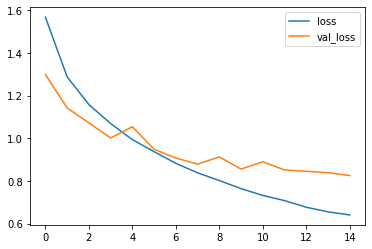

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

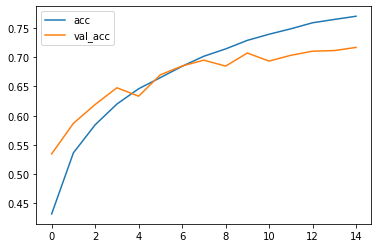

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[733  16  35  21  19   7   7   9 100  53]
 [ 11 785   4   4   4   3  10   3  42 134]
 [ 59   4 580  67 111  47  60  30  27  15]
 [ 23   6  63 525  72 154  70  43  22  22]
 [ 24   5  58  64 699  23  32  74  15   6]
 [ 13   4  41 215  53 553  29  61  16  15]
 [  9   7  33  58  50  15 801  11  13   3]
 [ 13   1  18  34  65  38   6 795   6  24]
 [ 32  30   9  13  14   4   1   3 863  31]
 [ 24  64   3  15   2   8   3  14  32 835]]


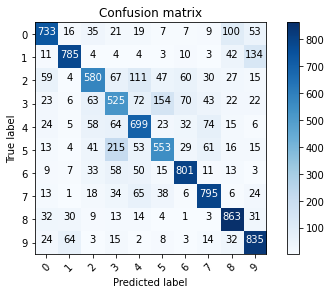

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

### **Show Classification Example**

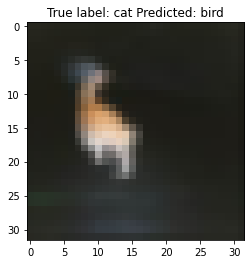

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));